# WELCOME!

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#NLP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)


# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

In [3]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop realted columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
    
###############################################################################

In [3]:
df0 = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df= df0.copy()
df.head()
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.describe().T
# df.describe(include=object).T

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [4]:
# df.profile_report()

In [5]:
df.head(2).T

,0,1
unnamed:_0,0,1
clothing_id,767,1080
age,33,34
title,NaN,NaN
review_text,Absolutely wonderful - silky and sexy and comfortable,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length..."
rating,4,5
recommended_ind,1,1
positive_feedback_count,0,4
division_name,Initmates,General
department_name,Intimate,Dresses


In [6]:
drop_columns(df, "unnamed:_0")
df.head(2).T

unnamed:_0 were dropped


,0,1
clothing_id,767,1080
age,33,34
title,NaN,NaN
review_text,Absolutely wonderful - silky and sexy and comfortable,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length..."
rating,4,5
recommended_ind,1,1
positive_feedback_count,0,4
division_name,Initmates,General
department_name,Intimate,Dresses
class_name,Intimates,Dresses


In [7]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
clothing_id,23486.00,918.12,203.30,0.00,861.00,936.00,1078.00,1205.00
age,23486.00,43.20,12.28,18.00,34.00,41.00,52.00,99.00
rating,23486.00,4.20,1.11,1.00,4.00,5.00,5.00,5.00
recommended_ind,23486.00,0.82,0.38,0.00,1.00,1.00,1.00,1.00
positive_feedback_count,23486.00,2.54,5.70,0.00,0.00,1.00,3.00,122.00


In [8]:
df.describe(include=object).T

,count,unique,top,freq
title,19676,13993,Love it!,136
review_text,22641,22634,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,3
division_name,23472,3,General,13850
department_name,23472,6,Tops,10468
class_name,23472,20,Dresses,6319


In [9]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [10]:
df["department_name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department_name, dtype: int64

In [11]:
df["rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

In [12]:
df["division_name"].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: division_name, dtype: int64

In [13]:
df["department_name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department_name, dtype: int64

In [14]:
df["class_name"].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class_name, dtype: int64

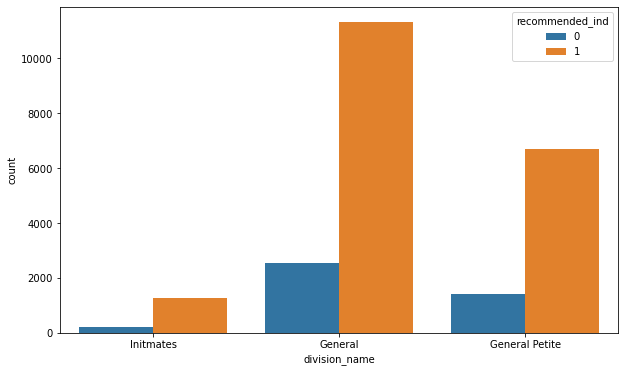

In [15]:
sns.countplot(data = df, x ="division_name", hue = "recommended_ind");

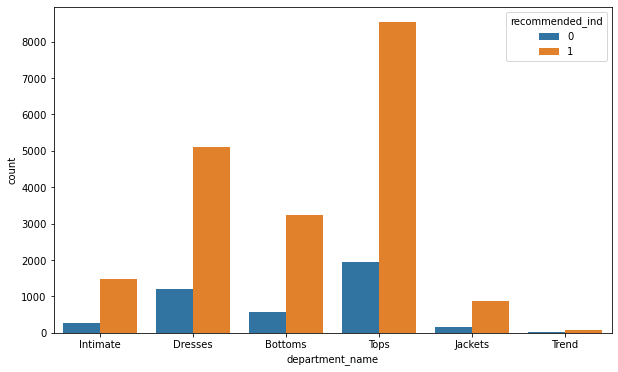

In [16]:
sns.countplot(data = df, x ="department_name", hue = "recommended_ind");

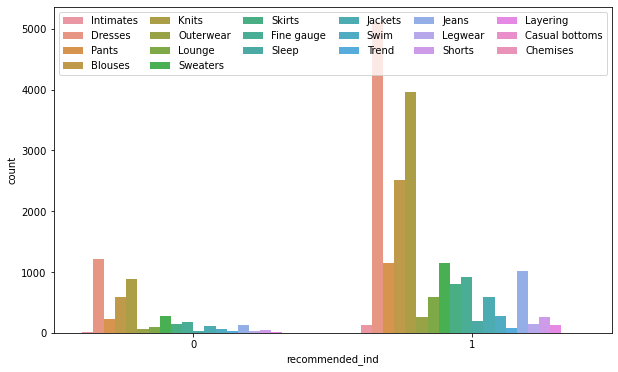

In [17]:
sns.countplot(data = df, x ="recommended_ind", hue = "class_name");
plt.legend(loc='best', mode = "expand", ncol = 6);

### Data Wrangling

In [18]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [19]:
df[['review_text', 'rating','recommended_ind', 'positive_feedback_count']].head(5)

,review_text,rating,recommended_ind,positive_feedback_count
0,Absolutely wonderful - silky and sexy and comfortable,4,1,0
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6


In [20]:
missing_values(df)

,Missing_Number,Missing_Percent
title,3810,0.162
review_text,845,0.036
division_name,14,0.001
department_name,14,0.001
class_name,14,0.001


In [21]:
df.dropna(subset=["review_text"], inplace=True)
missing_values(df)

,Missing_Number,Missing_Percent
title,2966,0.131
division_name,13,0.001
department_name,13,0.001
class_name,13,0.001


In [22]:
df.shape

(22641, 10)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [23]:
df["recommended_ind"].value_counts()
# Recommended:1
# Not Recommendation:0

1    18540
0     4101
Name: recommended_ind, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [24]:
df_ = df.copy()
df_.head(2).T

,0,1
clothing_id,767,1080
age,33,34
title,NaN,NaN
review_text,Absolutely wonderful - silky and sexy and comfortable,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length..."
rating,4,5
recommended_ind,1,1
positive_feedback_count,0,4
division_name,Initmates,General
department_name,Intimate,Dresses
class_name,Intimates,Dresses


In [25]:
df_.shape

(22641, 10)

In [26]:
missing_values(df_)

,Missing_Number,Missing_Percent
title,2966,0.131
division_name,13,0.001
department_name,13,0.001
class_name,13,0.001


In [27]:
drop_columns(df_, ['clothing_id', 'age', 'title', 'rating',
       'positive_feedback_count', 'division_name',
       'department_name', 'class_name'])
df_.head(3).T

['clothing_id', 'age', 'title', 'rating', 'positive_feedback_count', 'division_name', 'department_name', 'class_name'] were dropped


,0,1,2
review_text,Absolutely wonderful - silky and sexy and comfortable,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
recommended_ind,1,1,0


In [28]:
df_.shape

(22641, 2)

---
---


### Missing Value Detection

In [29]:
missing_values(df_)

,Missing_Number,Missing_Percent


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [30]:
df_.head(5)

,review_text,recommended_ind
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",1
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


In [31]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      22641 non-null  object
 1   recommended_ind  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [32]:
stop_words = stopwords.words('english')
len(stop_words)

179

In [33]:
# def cleaning(data):
    
#     import re
#     #1. Remove Puncs
#     # \w typically matches [A-Za-z0-9_]
#     text = re.sub('[^\w\s]','', data)
         
#     #2. Tokenize
#     text_tokens = word_tokenize(text.lower()) 
    
#     #3. Remove numbers
#     tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
#     #4. Removing Stopwords
#     tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
#     #5. lemma
#     text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
#     #joining
#     return " ".join(text_cleaned)

In [34]:
def cleaning(df):
    
    #1. Tokenize
    text_tokens = word_tokenize(df.replace("'", "").lower())
    
    #2. Remove Puncs
    tokens_without_punc = [i for i in text_tokens if i.isalpha()]
    # remove all punctuation
    # import string
    # df_["review_text"] = df_["review_text"].str.translate(str.maketrans('', '', string.punctuation))
    
    #3. Removing Stopwords
    tokens_without_sw = [i for i in tokens_without_punc if i not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(i) for i in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [35]:
df_["review_text"] = df_["review_text"].apply(cleaning)
df_[["review_text"]].head()

,review_text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt


In [36]:
df_[["review_text"]]

,review_text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt
...,...
23481,happy snag dress great price easy slip flattering cut color combo
23482,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok
23483,fit well top see never would worked im glad able try store didnt order online different fabric would great
23484,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress de...


### Rare Words

In [37]:
" ".join(df_["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [38]:
to_rare_words = pd.Series(" ".join(df_["review_text"]).split()).value_counts()
to_rare_words

dress            11352
fit              10128
size              9363
love              8992
top               8281
                 ...  
laec                 1
grandson             1
hyperhidrosis        1
ordred               1
homerun              1
Length: 11996, dtype: int64

In [39]:
rare_words = to_rare_words[to_rare_words <= 2]
rare_words 

invariably       2
wether           2
napa             2
avoided          2
waterfall        2
                ..
laec             1
grandson         1
hyperhidrosis    1
ordred           1
homerun          1
Length: 6497, dtype: int64

In [40]:
rare_words.index

Index(['invariably', 'wether', 'napa', 'avoided', 'waterfall', 'schoolmarm',
       'fails', 'colleague', 'fiddling', 'shifting',
       ...
       'unnoticable', 'hurdle', 'chocking', 'wilted', 'numbered', 'laec',
       'grandson', 'hyperhidrosis', 'ordred', 'homerun'],
      dtype='object', length=6497)

In [41]:
df_["review_text"] = df_["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_[["review_text"]].head()

#df_["review_text"] = df_["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words]))

,review_text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt


In [42]:
df[["review_text"]].head()

,review_text
0,Absolutely wonderful - silky and sexy and comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length..."
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [43]:
df_.columns

Index(['review_text', 'recommended_ind'], dtype='object')

In [44]:
df_[df_["recommended_ind"] == 0].head()

,review_text,recommended_ind
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...,0
5,love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...,0
10,dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back,0
22,first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sa...,0
25,loved material didnt really look long dress purchased large medium im atleast material foot gap front much wider look felt like dress fell flat returned im usually large med fit better jean,0


In [45]:
df_[df_["recommended_ind"] == 0]["recommended_ind"].value_counts()

0    4101
Name: recommended_ind, dtype: int64

In [46]:
df_[df_["recommended_ind"] == 1].head()

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1
6,basket hte last see would look like person store pick went teh color pale hte color really gorgeous turn trying little baggy hte x hte size bummer petite decided though said everything pant skirt ...,1


In [47]:
df_[df_["recommended_ind"] == 1]["recommended_ind"].value_counts()

1    18540
Name: recommended_ind, dtype: int64

### Collect Words (positive and negative separately)

In [48]:
all_words = " ".join(df_["review_text"]).split()
all_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [49]:
len(all_words)

633304

In [50]:
negatives = " ".join(df_[df_["recommended_ind"] == 0]["review_text"]).split()
negatives

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [51]:
len(negatives)

116488

In [52]:
positives =" ".join(df_[df_["recommended_ind"] == 1]["review_text"]).split()
positives

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [53]:
len(positives)

516816

In [54]:
len(negatives), len(positives), len(all_words), len(negatives) + len(positives)

(116488, 516816, 633304, 633304)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [55]:
from wordcloud import WordCloud

#### Wordcloud from Negative Reviews

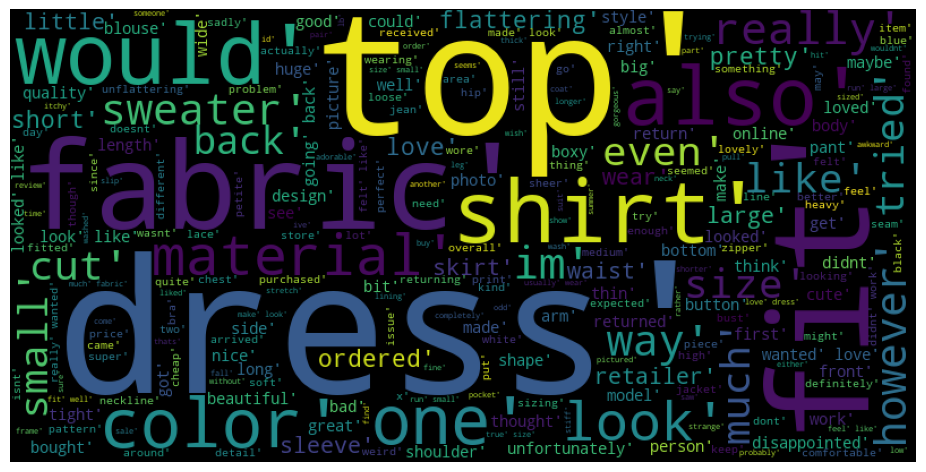

In [415]:
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words =250).generate(str(negatives))

plt.figure(figsize = (14, 6), dpi=100)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('positives.png', dpi=100);

#### Wordcloud from Positive Reviews

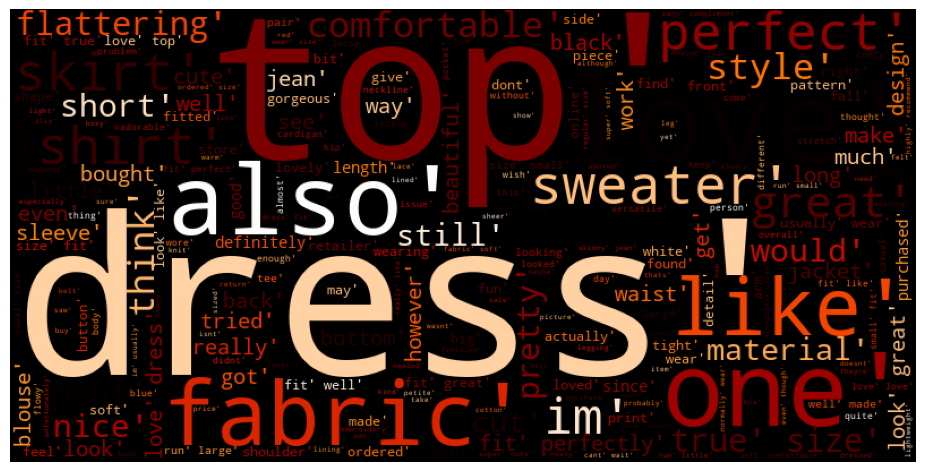

In [419]:
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words =250, colormap="gist_heat").generate(str(positives))

plt.figure(figsize = (14, 6), dpi=100)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('positives.png', dpi=100);

#### Wordcloud from All Reviews

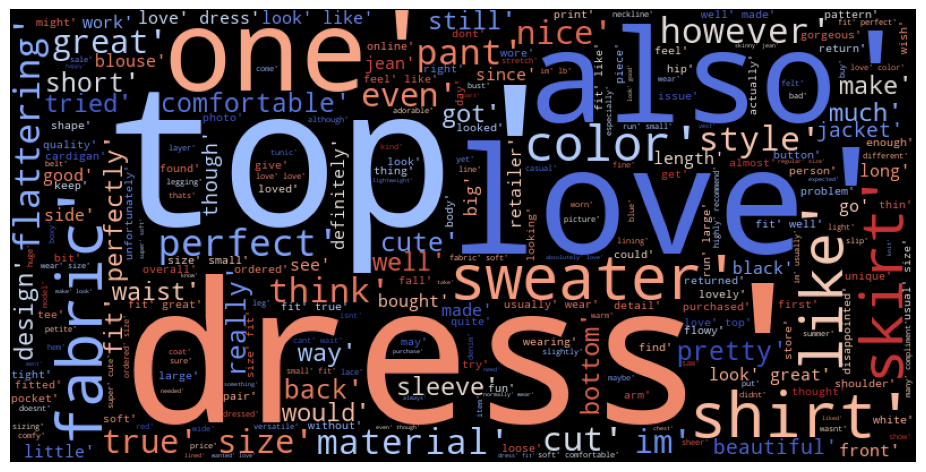

In [418]:
wordcloud = WordCloud(width=800, height=400, background_color="black", max_words =250, colormap="coolwarm").generate(str(all_words))

plt.figure(figsize = (14, 6), dpi=100)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('positives.png', dpi=100);

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
df_.head()

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...,0
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1


In [61]:
df_.shape

(22641, 2)

In [62]:
X = df_["review_text"]
y = df_["recommended_ind"].replace([0, 1],['not_recommended', 'recommended'])
y.value_counts()

recommended        18540
not_recommended     4101
Name: recommended_ind, dtype: int64

In [63]:
df_

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...,0
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1
...,...,...
23481,happy snag dress great price easy slip flattering cut color combo,1
23482,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok,1
23483,fit well top see never would worked im glad able try store didnt order online different fabric would great,0
23484,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress de...,1


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=101)

In [65]:
X.shape + y.shape, X_train.shape + X_test.shape, y_train.shape + y_test.shape

((22641, 22641), (18112, 4529), (18112, 4529))

In the next step we create a numerical feature vector for each document:

### Vectorization

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
count_vectorizer = CountVectorizer()
X_train_countVectorized = count_vectorizer.fit_transform(X_train)
X_test_countVectorized = count_vectorizer.transform(X_test)

In [68]:
X_train_countVectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
count_vectorizer.get_feature_names()

['aa',
 'ab',
 'abby',
 'abdomen',
 'ability',
 'able',
 'abo',
 'absolute',
 'absolutely',
 'absolutley',
 'abstract',
 'absurd',
 'abt',
 'abundance',
 'ac',
 'accent',
 'accented',
 'accentuate',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptable',
 'access',
 'accessorize',
 'accessorized',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accommodate',
 'accommodates',
 'accommodating',
 'accomodate',
 'according',
 'accordingly',
 'account',
 'accurate',
 'accurately',
 'achieve',
 'across',
 'acrylic',
 'act',
 'action',
 'active',
 'activewear',
 'activity',
 'actual',
 'actuality',
 'actually',
 'ad',
 'ada',
 'add',
 'added',
 'addicted',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adequate',
 'adequately',
 'adjust',
 'adjustable',
 'adjusted',
 'adjusting',
 'adjustment',
 'admire',
 'admired',
 'admiring',
 'admit',
 'admittedly',
 'adn',
 'ador',
 'adorable',
 'adore',
 'adored',
 'adult',
 'adva

In [70]:
pd.DataFrame(X_train_countVectorized.toarray(), columns = count_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,accidentally,accommodate,accommodates,accommodating,accomodate,according,accordingly,account,accurate,accurately,achieve,across,acrylic,act,action,active,activewear,activity,actual,actuality,actually,ad,ada,add,added,addicted,adding,addition,additional,additionally,address,adequate,adequately,adjust,adjustable,adjusted,adjusting,adjustment,admire,admired,admiring,admit,admittedly,adn,ador,adorable,adore,adored,adult,advantage,advertised,advice,advise,advised,aesthetic,aesthetically,affair,affect,afford,affordable,afraid,afternoon,afterward,afterwards,ag,age,aged,ago,agree,agreed,...,wondering,wonky,wont,wood,wooden,woodland,wool,woolite,wooly,word,wore,work,workable,worked,working,workmanship,workout,workplace,world,worn,worried,worry,worrying,worse,worst,worth,worthwhile,worthy,wou,woul,would,wouldnt,wouldve,wound,woven,wow,wowed,wrap,wrapped,wrapping,wri,wring,wrinkle,wrinkled,wrinkling,wrinkly,wrist,write,writing,written,wrong,wrote,xl,xmas,xsmall,xsp,xspetite,xtra,xx,xxl,xxsmall,xxsp,yarn,yay,yeah,year,yellow,yellowish,yellowy,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [71]:
pd.DataFrame(X_test_countVectorized.toarray(), columns = count_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,accidentally,accommodate,accommodates,accommodating,accomodate,according,accordingly,account,accurate,accurately,achieve,across,acrylic,act,action,active,activewear,activity,actual,actuality,actually,ad,ada,add,added,addicted,adding,addition,additional,additionally,address,adequate,adequately,adjust,adjustable,adjusted,adjusting,adjustment,admire,admired,admiring,admit,admittedly,adn,ador,adorable,adore,adored,adult,advantage,advertised,advice,advise,advised,aesthetic,aesthetically,affair,affect,afford,affordable,afraid,afternoon,afterward,afterwards,ag,age,aged,ago,agree,agreed,...,wondering,wonky,wont,wood,wooden,woodland,wool,woolite,wooly,word,wore,work,workable,worked,working,workmanship,workout,workplace,world,worn,worried,worry,worrying,worse,worst,worth,worthwhile,worthy,wou,woul,would,wouldnt,wouldve,wound,woven,wow,wowed,wrap,wrapped,wrapping,wri,wring,wrinkle,wrinkled,wrinkling,wrinkly,wrist,write,writing,written,wrong,wrote,xl,xmas,xsmall,xsp,xspetite,xtra,xx,xxl,xxsmall,xxsp,yarn,yay,yeah,year,yellow,yellowish,yellowy,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [72]:
len(y_train)

18112

In [73]:
y_train.value_counts()

recommended        14831
not_recommended     3281
Name: recommended_ind, dtype: int64

In [74]:
len(y_test)

4529

In [75]:
y_test.value_counts()

recommended        3709
not_recommended     820
Name: recommended_ind, dtype: int64

### Model Comparisons - Vectorization

In [76]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score

In [77]:
def predict(model, X_train, X_test):
    
    y_pred_train = model.predict(X_train)
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    
    plot_confusion_matrix(model, X_test, y_test)

## Naive Bayes

In [78]:
from sklearn.naive_bayes import MultinomialNB # BernoulliNB for binary model

In [79]:
nb = MultinomialNB()
nb.fit(X_train_countVectorized, y_train)

MultinomialNB()

NB MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.70      0.82      0.75      3281
    recommended       0.96      0.92      0.94     14831

       accuracy                           0.90     18112
      macro avg       0.83      0.87      0.85     18112
   weighted avg       0.91      0.90      0.91     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.67      0.74      0.70       820
    recommended       0.94      0.92      0.93      3709

       accuracy                           0.89      4529
      macro avg       0.80      0.83      0.82      4529
   weighted avg       0.89      0.89      0.89      4529



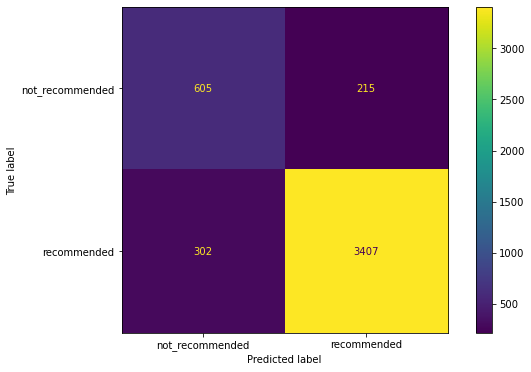

In [80]:
print("NB MODEL")
predict(nb, X_train_countVectorized, X_test_countVectorized)

In [377]:
# TRAIN
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(MultinomialNB(),
                           classes=nb.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized, y_train)
viz.score(X_train_countVectorized, y_train)
viz.show(); #viz.poof()  viz.draw()

ValueError: y_true takes value in {'not_recommended', 'recommended'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [174]:
# TEST
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(MultinomialNB(),
                           classes=nb.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized, y_train)
viz.score(X_test_countVectorized, y_test)
viz.show();

In [141]:
viz.score_ 

In [184]:
y_pred = nb.predict(X_test_countVectorized)
nb_countVectorized_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
nb_countVectorized_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
nb_AP_neg = viz.score_

In [185]:
nb_countVectorized_recall_neg

array([0.73780488])

In [186]:
nb_countVectorized_f1_neg

array([0.70063694])

In [187]:
nb_AP_neg

0.8858467652903511

In [ ]:
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_countVectorized, y_train)

LogisticRegression(C=0.02, max_iter=1000)

LOG MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.82      0.49      0.61      3281
    recommended       0.90      0.98      0.93     14831

       accuracy                           0.89     18112
      macro avg       0.86      0.73      0.77     18112
   weighted avg       0.88      0.89      0.88     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.80      0.48      0.60       820
    recommended       0.89      0.97      0.93      3709

       accuracy                           0.88      4529
      macro avg       0.85      0.73      0.77      4529
   weighted avg       0.88      0.88      0.87      4529



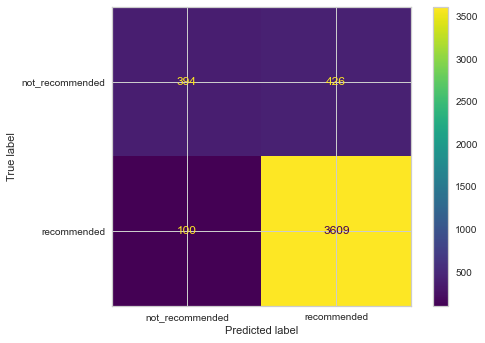

In [189]:
print("LOG MODEL")
predict(log, X_train_countVectorized, X_test_countVectorized)

In [190]:
viz = PrecisionRecallCurve(LogisticRegression(C = 0.02, max_iter=1000),
                           classes=log.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized, y_train)
viz.score(X_test_countVectorized, y_test)
viz.show();

In [191]:
y_pred = log.predict(X_test_countVectorized)
log_countVectorized_recall_neg = recall_score(y_test, y_pred, pos_label=["not_recommended"], average=None)
log_countVectorized_f1_neg = f1_score(y_test, y_pred, pos_label=["not_recommended"], average=None)
log_AP_neg = viz.score_

In [252]:
log_balanced = LogisticRegression(C=0.02, max_iter=1000, class_weight='balanced')
log_balanced.fit(X_train_countVectorized, y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.60      0.89      0.71      3281
    recommended       0.97      0.87      0.92     14831

       accuracy                           0.87     18112
      macro avg       0.78      0.88      0.82     18112
   weighted avg       0.90      0.87      0.88     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.57      0.85      0.68       820
    recommended       0.96      0.86      0.91      3709

       accuracy                           0.85      4529
      macro avg       0.76      0.85      0.79      4529
   weighted avg       0.89      0.85      0.86      4529



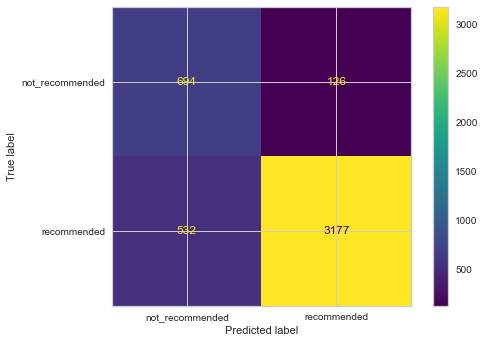

In [253]:
print("LOG MODEL BALANCED")
predict(log_balanced, X_train_countVectorized, X_test_countVectorized)

In [ ]:
viz = PrecisionRecallCurve(LogisticRegression(C = 0.02, max_iter=1000),
                           classes=log_balanced.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized, y_train)
viz.score(X_test_countVectorized, y_test)
viz.show();

In [254]:
y_pred = log_balanced.predict(X_test_countVectorized)
logBalanced_countVectorized_recall_neg = recall_score(y_test, y_pred, pos_label=["not_recommended"], average=None)
logBalanced_countVectorized_f1_neg = f1_score(y_test, y_pred, pos_label=["not_recommended"], average=None)
logBalanced_AP_neg = viz.score_

## SVM

In [195]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_countVectorized, y_train)

LinearSVC(C=0.01)

SVC MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.85      0.63      0.72      3281
    recommended       0.92      0.97      0.95     14831

       accuracy                           0.91     18112
      macro avg       0.88      0.80      0.84     18112
   weighted avg       0.91      0.91      0.91     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.78      0.56      0.65       820
    recommended       0.91      0.96      0.94      3709

       accuracy                           0.89      4529
      macro avg       0.84      0.76      0.79      4529
   weighted avg       0.89      0.89      0.88      4529



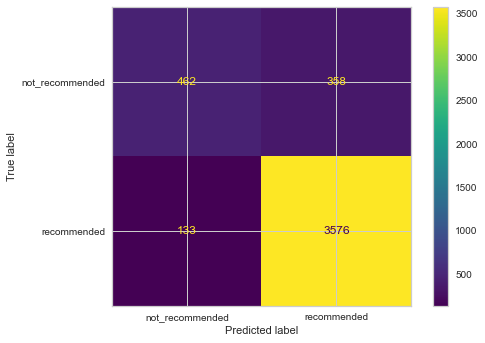

In [196]:
print("SVC MODEL")
predict(svc, X_train_countVectorized, X_test_countVectorized)

In [ ]:
viz = PrecisionRecallCurve(LinearSVC(C=0.01),
                           classes=svc.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized, y_train)
viz.score(X_test_countVectorized, y_test)
viz.show();

In [198]:
y_pred = svc.predict(X_test_countVectorized)
svc_countVectorized_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
svc_countVectorized_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
svc_AP_neg = viz.score_

## KNN

In [199]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_countVectorized, y_train)

KNeighborsClassifier(n_neighbors=7)

KNN MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.87      0.12      0.21      3281
    recommended       0.84      1.00      0.91     14831

       accuracy                           0.84     18112
      macro avg       0.86      0.56      0.56     18112
   weighted avg       0.84      0.84      0.78     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.67      0.05      0.10       820
    recommended       0.83      0.99      0.90      3709

       accuracy                           0.82      4529
      macro avg       0.75      0.52      0.50      4529
   weighted avg       0.80      0.82      0.76      4529



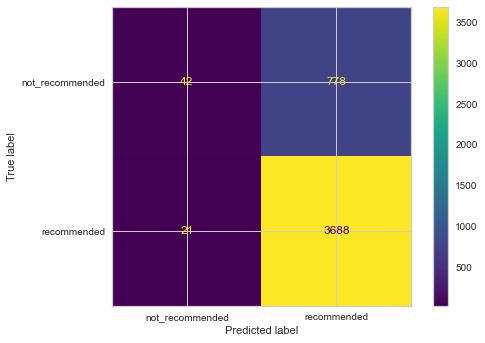

In [200]:
print("KNN MODEL")
predict(knn, X_train_countVectorized, X_test_countVectorized)

In [ ]:
viz = PrecisionRecallCurve(KNeighborsClassifier(n_neighbors=7),
                           classes=knn.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized, y_train)
viz.score(X_test_countVectorized, y_test)
viz.show();

In [201]:
y_pred = knn.predict(X_test_countVectorized)
knn_countVectorized_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
knn_countVectorized_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
knn_AP_neg = viz.score_

## Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth=40, random_state=42, n_jobs=-1) # class_weight="balanced"
rf.fit(X_train_countVectorized, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

RF MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       1.00      0.61      0.76      3281
    recommended       0.92      1.00      0.96     14831

       accuracy                           0.93     18112
      macro avg       0.96      0.81      0.86     18112
   weighted avg       0.94      0.93      0.92     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.88      0.13      0.22       820
    recommended       0.84      1.00      0.91      3709

       accuracy                           0.84      4529
      macro avg       0.86      0.56      0.57      4529
   weighted avg       0.85      0.84      0.79      4529



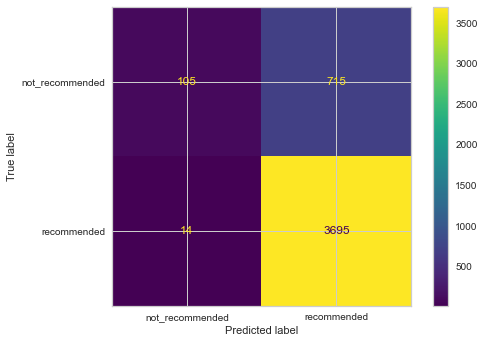

In [203]:
print("RF MODEL")
predict(rf, X_train_countVectorized, X_test_countVectorized)

In [ ]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth=40, random_state=42, n_jobs=-1),
                           classes=rf.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized,y_train)
viz.score(X_test_countVectorized, y_test)
viz.show();

In [205]:
y_pred = rf.predict(X_test_countVectorized)
rf_countVectorized_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
rf_countVectorized_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
rf_AP_neg = viz.score_

In [249]:
rf_balanced = RandomForestClassifier(100, 
                            max_depth=40, 
                            random_state=42, 
                            n_jobs=-1, 
                            class_weight="balanced")
rf_balanced.fit(X_train_countVectorized, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.93      0.98      0.95      3281
    recommended       1.00      0.98      0.99     14831

       accuracy                           0.98     18112
      macro avg       0.96      0.98      0.97     18112
   weighted avg       0.98      0.98      0.98     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.70      0.53      0.60       820
    recommended       0.90      0.95      0.93      3709

       accuracy                           0.87      4529
      macro avg       0.80      0.74      0.76      4529
   weighted avg       0.87      0.87      0.87      4529



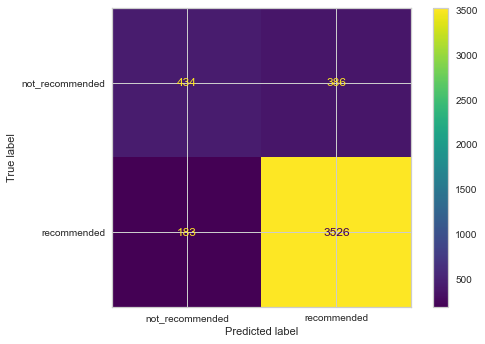

In [250]:
print("RF MODEL BALANCED")
predict(rf_balanced, X_train_countVectorized, X_test_countVectorized)

In [ ]:
viz = PrecisionRecallCurve(LogisticRegression(C = 0.02, max_iter=1000),
                           classes=rf_balanced.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized, y_train)
viz.score(X_test_countVectorized, y_test)
viz.show();

In [251]:
y_pred = rf_balanced.predict(X_test_countVectorized)
rfBalanced_countVectorized_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
rfBalanced_countVectorized_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
rfBalanced_AP_neg = viz.score_

## Ada Boost

In [209]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, 
                         random_state = 42)
ada.fit(X_train_countVectorized, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.79      0.66      0.72      3281
    recommended       0.93      0.96      0.94     14831

       accuracy                           0.91     18112
      macro avg       0.86      0.81      0.83     18112
   weighted avg       0.90      0.91      0.90     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.72      0.58      0.64       820
    recommended       0.91      0.95      0.93      3709

       accuracy                           0.88      4529
      macro avg       0.81      0.76      0.78      4529
   weighted avg       0.88      0.88      0.88      4529



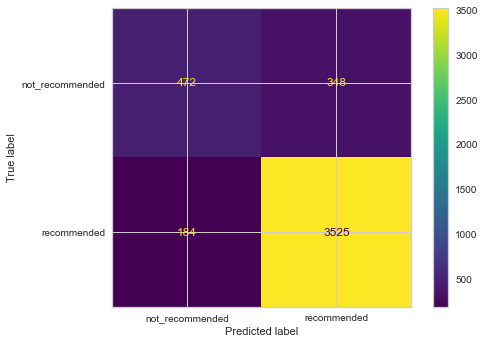

In [210]:
print("Ada MODEL")
predict(ada, X_train_countVectorized, X_test_countVectorized)

In [ ]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 500, random_state = 42),
                           classes=ada.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_countVectorized, y_train)
viz.score(X_test_countVectorized, y_test)
viz.show();

In [211]:
y_pred = ada.predict(X_test_countVectorized)
ada_countVectorized_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
ada_countVectorized_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
ada_AP_neg = viz.score_

## With TF-IDF-Vectorizer

In [ ]:
# count_vectorizer = CountVectorizer()
# X_train_countVectorized = count_vectorizer.fit_transform(X_train)
# X_test_countVectorized = count_vectorizer.transform(X_test)

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [213]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tfIdf_vectorized = tf_idf_vectorizer.fit_transform(X_train)
X_test_tfIdf_vectorized = tf_idf_vectorizer.transform(X_test)

In [214]:
X_train_tfIdf_vectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [215]:
pd.DataFrame(X_train_tfIdf_vectorized.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,accidentally,accommodate,accommodates,accommodating,accomodate,according,accordingly,account,accurate,accurately,achieve,across,acrylic,act,action,active,activewear,activity,actual,actuality,actually,ad,ada,add,added,addicted,adding,addition,additional,additionally,address,adequate,adequately,adjust,adjustable,adjusted,adjusting,adjustment,admire,admired,admiring,admit,admittedly,adn,ador,adorable,adore,adored,adult,advantage,advertised,advice,advise,advised,aesthetic,aesthetically,affair,affect,afford,affordable,afraid,afternoon,afterward,afterwards,ag,age,aged,ago,agree,agreed,...,wondering,wonky,wont,wood,wooden,woodland,wool,woolite,wooly,word,wore,work,workable,worked,working,workmanship,workout,workplace,world,worn,worried,worry,worrying,worse,worst,worth,worthwhile,worthy,wou,woul,would,wouldnt,wouldve,wound,woven,wow,wowed,wrap,wrapped,wrapping,wri,wring,wrinkle,wrinkled,wrinkling,wrinkly,wrist,write,writing,written,wrong,wrote,xl,xmas,xsmall,xsp,xspetite,xtra,xx,xxl,xxsmall,xxsp,yarn,yay,yeah,year,yellow,yellowish,yellowy,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0

## Model Comparisons  TF-IDF

## Naive Bayes

In [216]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tfIdf_vectorized, y_train)

MultinomialNB()

NB MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.95      0.23      0.37      3281
    recommended       0.85      1.00      0.92     14831

       accuracy                           0.86     18112
      macro avg       0.90      0.61      0.65     18112
   weighted avg       0.87      0.86      0.82     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.87      0.16      0.28       820
    recommended       0.84      0.99      0.91      3709

       accuracy                           0.84      4529
      macro avg       0.86      0.58      0.59      4529
   weighted avg       0.85      0.84      0.80      4529



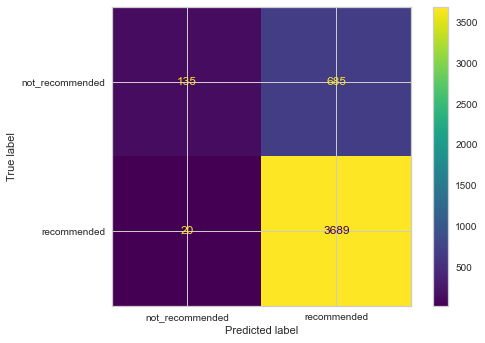

In [217]:
print("NB MODEL")
predict(nb, X_train_tfIdf_vectorized, X_test_tfIdf_vectorized)

In [ ]:
viz = PrecisionRecallCurve(MultinomialNB(),
                           classes=nb.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tfIdf_vectorized, y_train)
viz.score(X_test_tfIdf_vectorized, y_test)
viz.show();

In [218]:
y_pred = nb.predict(X_test_tfIdf_vectorized)
nb_tfIdf_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
nb_tfIdf_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
nb_tfIdf_AP_neg = viz.score_

## Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tfIdf_vectorized, y_train)

LogisticRegression(C=0.4, max_iter=1000)

LOG MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.85      0.47      0.60      3281
    recommended       0.89      0.98      0.94     14831

       accuracy                           0.89     18112
      macro avg       0.87      0.72      0.77     18112
   weighted avg       0.89      0.89      0.87     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.82      0.42      0.56       820
    recommended       0.89      0.98      0.93      3709

       accuracy                           0.88      4529
      macro avg       0.85      0.70      0.74      4529
   weighted avg       0.87      0.88      0.86      4529



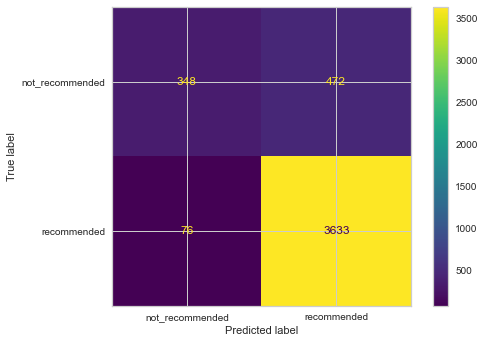

In [220]:
print("LOG MODEL")
predict(log, X_train_tfIdf_vectorized, X_test_tfIdf_vectorized)

In [ ]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.4, max_iter=1000),
                           classes=log.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tfIdf_vectorized,y_train)
viz.score(X_test_tfIdf_vectorized, y_test)
viz.show();

In [221]:
y_pred = log.predict(X_test_tfIdf_vectorized)
log_tfIdf_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
log_tfIdf_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
log_tfIdf_AP_neg = viz.score_

In [245]:
log_balanced = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log_balanced.fit(X_train_tfIdf_vectorized, y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

log_balanced MODEL BALANCED
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.61      0.91      0.73      3281
    recommended       0.98      0.87      0.92     14831

       accuracy                           0.88     18112
      macro avg       0.79      0.89      0.83     18112
   weighted avg       0.91      0.88      0.89     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.58      0.86      0.70       820
    recommended       0.97      0.86      0.91      3709

       accuracy                           0.86      4529
      macro avg       0.77      0.86      0.80      4529
   weighted avg       0.90      0.86      0.87      4529



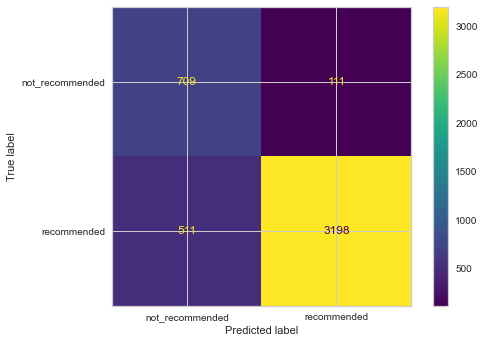

In [246]:
print("log_balanced MODEL BALANCED")
predict(log_balanced, X_train_tfIdf_vectorized, X_test_tfIdf_vectorized)

In [ ]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.4, max_iter=1000),
                           classes=log_balanced.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tfIdf_vectorized,y_train)
viz.score(X_test_tfIdf_vectorized, y_test)
viz.show();

In [248]:
y_pred = log_balanced.predict(X_test_tfIdf_vectorized)
logBalanced_tfIdf_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
logBalanced_tfIdf_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
logBalanced_tfIdf_AP_neg = viz.score_

## SVM

In [225]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tfIdf_vectorized, y_train)

LinearSVC(C=0.1)

SVC MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.86      0.59      0.70      3281
    recommended       0.92      0.98      0.95     14831

       accuracy                           0.91     18112
      macro avg       0.89      0.79      0.82     18112
   weighted avg       0.90      0.91      0.90     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.81      0.53      0.64       820
    recommended       0.90      0.97      0.94      3709

       accuracy                           0.89      4529
      macro avg       0.86      0.75      0.79      4529
   weighted avg       0.89      0.89      0.88      4529



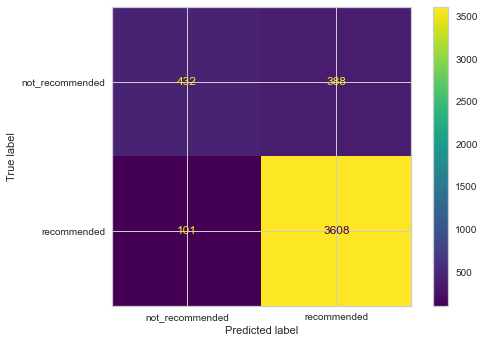

In [226]:
print("SVC MODEL")
predict(svc, X_train_tfIdf_vectorized, X_test_tfIdf_vectorized)

In [ ]:
viz = PrecisionRecallCurve(LinearSVC(C=0.1),
                           classes=svc.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tfIdf_vectorized,y_train)
viz.score(X_test_tfIdf_vectorized, y_test)
viz.show();

In [227]:
y_pred = svc.predict(X_test_tfIdf_vectorized)
svc_tfIdf_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
svc_tfIdf_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
svc_tfIdf_AP_neg = viz.score_

## KNN

In [228]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tfIdf_vectorized, y_train)

KNeighborsClassifier(n_neighbors=7)

KNN MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.86      0.39      0.54      3281
    recommended       0.88      0.99      0.93     14831

       accuracy                           0.88     18112
      macro avg       0.87      0.69      0.73     18112
   weighted avg       0.88      0.88      0.86     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.73      0.26      0.39       820
    recommended       0.86      0.98      0.91      3709

       accuracy                           0.85      4529
      macro avg       0.79      0.62      0.65      4529
   weighted avg       0.83      0.85      0.82      4529



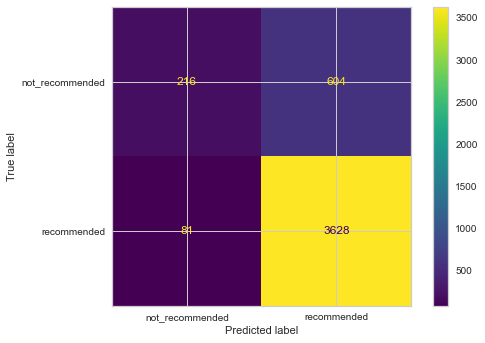

In [229]:
print("KNN MODEL")
predict(knn, X_train_tfIdf_vectorized, X_test_tfIdf_vectorized)

In [ ]:
viz = PrecisionRecallCurve(KNeighborsClassifier(n_neighbors=7),
                           classes=knn.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tfIdf_vectorized, y_train)
viz.score(X_test_tfIdf_vectorized, y_test)
viz.show();

In [230]:
y_pred = knn.predict(X_test_tfIdf_vectorized)
knn_tfIdf_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
knn_tfIdf_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
knn_tfIdf_AP_neg = viz.score_

## RandomForest

In [231]:
rf = RandomForestClassifier(100, 
                            max_depth=40, 
                            random_state = 42, 
                            n_jobs = -1)
rf.fit(X_train_tfIdf_vectorized, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

RF MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       1.00      0.57      0.73      3281
    recommended       0.91      1.00      0.95     14831

       accuracy                           0.92     18112
      macro avg       0.96      0.79      0.84     18112
   weighted avg       0.93      0.92      0.91     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.93      0.14      0.24       820
    recommended       0.84      1.00      0.91      3709

       accuracy                           0.84      4529
      macro avg       0.89      0.57      0.58      4529
   weighted avg       0.86      0.84      0.79      4529



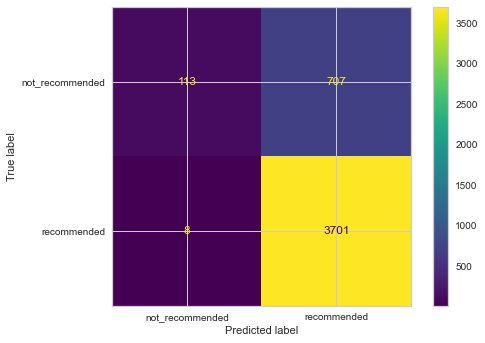

In [232]:
print("RF MODEL")
predict(rf, X_train_tfIdf_vectorized, X_test_tfIdf_vectorized)

In [ ]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
                           classes=rf.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tfIdf_vectorized, y_train)
viz.score(X_test_tfIdf_vectorized, y_test)
viz.show();

In [233]:
y_pred = rf.predict(X_test_tfIdf_vectorized)
rf_tfIdf_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
rf_tfIdf_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
rf_tfIdf_AP_neg = viz.score_

In [241]:
rf_balanced = RandomForestClassifier(100,
                            max_depth=15,
                            random_state=42,
                            n_jobs=-1,
                            class_weight="balanced")
rf_balanced.fit(X_train_tfIdf_vectorized, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

rf_balanced MODEL BALANCED
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.65      0.93      0.76      3281
    recommended       0.98      0.89      0.93     14831

       accuracy                           0.90     18112
      macro avg       0.81      0.91      0.85     18112
   weighted avg       0.92      0.90      0.90     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.55      0.76      0.64       820
    recommended       0.94      0.86      0.90      3709

       accuracy                           0.84      4529
      macro avg       0.75      0.81      0.77      4529
   weighted avg       0.87      0.84      0.85      4529



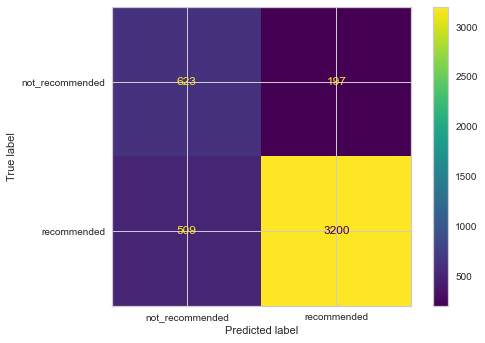

In [242]:
print("rf_balanced MODEL BALANCED")
predict(rf_balanced, X_train_tfIdf_vectorized, X_test_tfIdf_vectorized)

In [ ]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
                           classes=rf_balanced.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tfIdf_vectorized, y_train)
viz.score(X_test_tfIdf_vectorized, y_test)
viz.show();

In [243]:
y_pred = rf_balanced.predict(X_test_tfIdf_vectorized)
rfBalanced_tfIdf_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
rfBalanced_tfIdf_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
rfBalanced_tfIdf_AP_neg = viz.score_

## Ada Boost

In [238]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tfIdf_vectorized, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Train_Set
                 precision    recall  f1-score   support

not_recommended       0.82      0.72      0.77      3281
    recommended       0.94      0.97      0.95     14831

       accuracy                           0.92     18112
      macro avg       0.88      0.84      0.86     18112
   weighted avg       0.92      0.92      0.92     18112

Test_Set
                 precision    recall  f1-score   support

not_recommended       0.70      0.59      0.64       820
    recommended       0.91      0.95      0.93      3709

       accuracy                           0.88      4529
      macro avg       0.81      0.77      0.79      4529
   weighted avg       0.88      0.88      0.88      4529



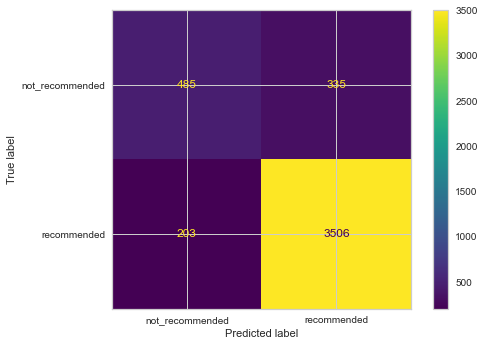

In [239]:
print("Ada MODEL")
predict(ada, X_train_tfIdf_vectorized, X_test_tfIdf_vectorized)

In [ ]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 500, random_state = 42),
                           classes=ada.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tfIdf_vectorized, y_train)
viz.score(X_test_tfIdf_vectorized, y_test)
viz.show();

In [258]:
y_pred = ada.predict(X_test_tfIdf_vectorized)
ada_tfIdf_recall_neg = recall_score(y_test, y_pred, labels=["not_recommended"], average=None)
ada_tfIdf_f1_neg = f1_score(y_test, y_pred, labels=["not_recommended"], average=None)
ada_tfIdf_AP_neg = viz.score_

## Compare Scoring

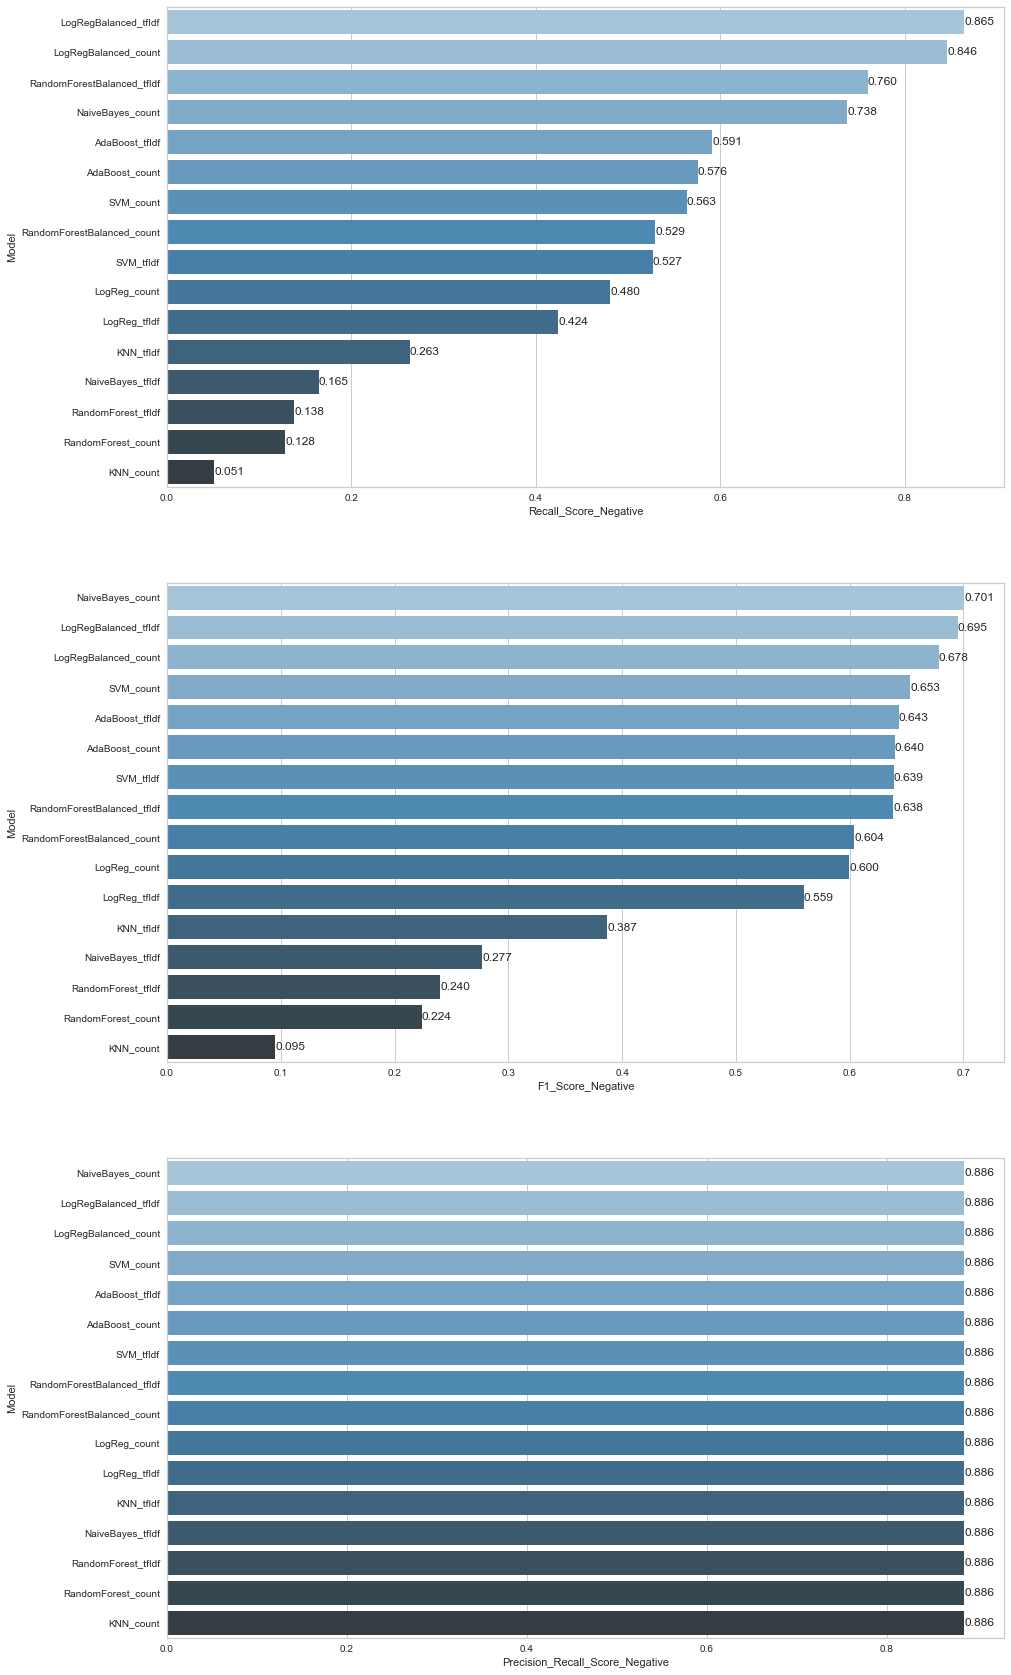

In [257]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", 
                                  "LogReg_count",
                                  "LogRegBalanced_count",
                                  "SVM_count", 
                                  "KNN_count", 
                                  "RandomForest_count",
                                  "RandomForestBalanced_count", 
                                  "AdaBoost_count", 
                                  "NaiveBayes_tfIdf", 
                                  "LogReg_tfIdf", 
                                  "LogRegBalanced_tfIdf",
                                  "SVM_tfIdf", 
                                  "KNN_tfIdf", 
                                  "RandomForest_tfIdf",
                                  "RandomForestBalanced_tfIdf", 
                                  "AdaBoost_tfIdf"],
                        
                        "F1_Score_Negative": [nb_countVectorized_f1_neg[0],
                                              log_countVectorized_f1_neg[0],
                                              logBalanced_countVectorized_f1_neg[0],
                                              svc_countVectorized_f1_neg[0],
                                              knn_countVectorized_f1_neg[0],
                                              rf_countVectorized_f1_neg[0],
                                              rfBalanced_countVectorized_f1_neg[0],
                                              ada_countVectorized_f1_neg[0],
                                              nb_tfIdf_f1_neg[0], 
                                              log_tfIdf_f1_neg[0],
                                              logBalanced_tfIdf_f1_neg[0],
                                              svc_tfIdf_f1_neg[0], 
                                              knn_tfIdf_f1_neg[0], 
                                              rf_tfIdf_f1_neg[0],
                                              rfBalanced_tfIdf_f1_neg[0],
                                              ada_tfIdf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [nb_countVectorized_recall_neg[0], 
                                                  log_countVectorized_recall_neg[0], 
                                                  logBalanced_countVectorized_recall_neg[0], 
                                                  svc_countVectorized_recall_neg[0], 
                                                  knn_countVectorized_recall_neg[0], 
                                                  rf_countVectorized_recall_neg[0],
                                                  rfBalanced_countVectorized_recall_neg[0], 
                                                  ada_countVectorized_recall_neg[0], 
                                                  nb_tfIdf_recall_neg[0], 
                                                  log_tfIdf_recall_neg[0],
                                                  logBalanced_tfIdf_recall_neg[0], 
                                                  svc_tfIdf_recall_neg[0], 
                                                  knn_tfIdf_recall_neg[0], 
                                                  rf_tfIdf_recall_neg[0],
                                                  rfBalanced_tfIdf_recall_neg[0], 
                                                  ada_tfIdf_recall_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [nb_AP_neg, 
                                                            log_AP_neg,
                                                            logBalanced_AP_neg, 
                                                            svc_AP_neg, 
                                                            knn_AP_neg, 
                                                            rf_AP_neg,
                                                            rfBalanced_AP_neg,
                                                            ada_AP_neg, 
                                                            nb_tfIdf_AP_neg, 
                                                            log_tfIdf_AP_neg,
                                                            logBalanced_tfIdf_AP_neg,
                                                            svc_tfIdf_AP_neg,
                                                            knn_tfIdf_AP_neg, 
                                                            rf_tfIdf_AP_neg,
                                                            rfBalanced_tfIdf_AP_neg,
                                                            ada_tfIdf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 3 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

## Cross Val

In [261]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-neg': make_scorer(precision_score, average=None, labels=["not_recommended"]),
                 'recall-neg': make_scorer(recall_score, average=None, labels=["not_recommended"]),
                 'f1-neg': make_scorer(f1_score, average=None, labels=["not_recommended"]),
                 
                 'precision-neutral': make_scorer(precision_score, average=None, labels=["neutral"]),
                 'recall-neutral': make_scorer(recall_score, average=None, labels = ["neutral"]),
                 'f1-neutral': make_scorer(f1_score, average=None, labels = ["neutral"]),
                 
                 'precision-pos': make_scorer(precision_score, average=None, labels=["recommended"]),
                 'recall-pos': make_scorer(recall_score, average=None, labels = ["recommended"]),
                 'f1-pos': make_scorer(f1_score, average=None, labels = ["recommended"]),
                 }

for i, j  in custom_scorer.items():
    model = LogisticRegression(C=0.4,
                               max_iter=1000,
                               class_weight="balanced")
    scores = cross_val_score(model,
                             X_train_tfIdf_vectorized,
                             y_train,
                             cv = 10,
                             scoring = j,
                             n_jobs = -1).mean()
    print(f" {i:20} score : {scores}\n")

 accuracy             score : 0.8579937663262159

 precision-neg        score : 0.5732300346069474

 recall-neg           score : 0.8503502854177478

 f1-neg               score : 0.6845710598549531

 precision-neutral    score : 0.0

 recall-neutral       score : 0.0

 f1-neutral           score : 0.0

 precision-pos        score : 0.9629653573365407

 recall-pos           score : 0.8596851468484695

 f1-pos               score : 0.9083524424413347



## DL modeling

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [266]:
df.head(3).T

,0,1,2
clothing_id,767,1080,1077
age,33,34,60
title,NaN,NaN,Some major design flaws
review_text,Absolutely wonderful - silky and sexy and comfortable,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
rating,4,5,3
recommended_ind,1,1,0
positive_feedback_count,0,4,0
division_name,Initmates,General,General
department_name,Intimate,Dresses,Dresses
class_name,Intimates,Dresses,Dresses


In [268]:
df_.head(5)

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...,0
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1


In [269]:
missing_values(df)

,Missing_Number,Missing_Percent
title,2966,0.131
division_name,13,0.001
department_name,13,0.001
class_name,13,0.001


In [270]:
df__ = df[["review_text", "recommended_ind"]]

In [271]:
df__

,review_text,recommended_ind
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",1
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
...,...,...
23481,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,1
23482,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...",1
23483,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...",0
23484,"I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...",1


In [272]:
missing_values(df__)

,Missing_Number,Missing_Percent


## Tokenization

In [274]:
X = df__["review_text"].values
y = df__["recommended_ind"].values

In [275]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [276]:
y

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [281]:
df__["recommended_ind"].value_counts()

1    18540
0     4101
Name: recommended_ind, dtype: int64

In [282]:
df__.shape

(22641, 2)

In [283]:
num_words = 10000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
#     num_words=None,
#     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

In [284]:
df__.shape

(22641, 2)

In [285]:
tokenizer.fit_on_texts(X)

## Creating word index

In [286]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [287]:
len(tokenizer.word_index)

14847

In [288]:
words = pd.DataFrame.from_dict(tokenizer.word_index, orient="index").reset_index()
words.columns = ['words', 'drop']

In [289]:
words = words.drop('drop', axis=1)

In [290]:
words.value_counts()

words      
\r             1
poodle         1
poof           1
poofed         1
poofier        1
              ..
excellently    1
excels         1
except         1
exception      1
ã¼ber          1
Length: 14847, dtype: int64

In [291]:
words.head(5)

,words
0,the
1,i
2,and
3,a
4,it


In [292]:
words.index += 1 

In [293]:
words.head()

,words
1,the
2,i
3,and
4,a
5,it


In [294]:
words.tail()

,words
14843,donse't
14844,population
14845,camoflauges
14846,blaring
14847,platinum


In [295]:
words.iloc[0:10]

,words
1,the
2,i
3,and
4,a
5,it
6,is
7,this
8,to
9,in
10,but


In [297]:
words.iloc[9989:10000]

,words
9990,awareness
9991,sai
9992,'fall'
9993,sungarden
9994,trusting
9995,uptown
9996,spattering
9997,dr4ess
9998,density
9999,42dd


## Converting tokens to numeric

In [298]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [299]:
X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


In [301]:
len(X_num_tokens)

22641

In [338]:
X_num_tokens[105]

[1,
 80,
 6,
 478,
 30,
 5,
 6,
 389,
 2,
 24,
 1,
 1905,
 482,
 47,
 3,
 21,
 5,
 2,
 243,
 2182,
 210,
 189,
 563,
 14,
 92,
 3,
 871,
 313,
 4,
 283,
 109,
 5,
 78,
 130,
 8,
 22,
 30,
 2,
 239,
 32,
 4,
 46,
 9,
 75,
 103,
 143,
 5,
 6,
 1,
 2868,
 77,
 148,
 9,
 1,
 200,
 2,
 41,
 324,
 7,
 25,
 4,
 265,
 265]

In [340]:
df__.iloc[[105]]

,review_text,recommended_ind
108,"The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i no...",1


In [337]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [336]:
print(X_num_tokens[105])

[1, 80, 6, 478, 30, 5, 6, 389, 2, 24, 1, 1905, 482, 47, 3, 21, 5, 2, 243, 2182, 210, 189, 563, 14, 92, 3, 871, 313, 4, 283, 109, 5, 78, 130, 8, 22, 30, 2, 239, 32, 4, 46, 9, 75, 103, 143, 5, 6, 1, 2868, 77, 148, 9, 1, 200, 2, 41, 324, 7, 25, 4, 265, 265]


In [341]:
tokenizer.word_index["exactly"]

478

In [311]:
def return_key(dictionary, val):
    for key, value in dictionary.items():
        if value==val:
            return key
    return('Key Not Found')

In [335]:
X_num_tokens_word = []
for i in X_num_tokens[105]:
    val_key = return_key(tokenizer.word_index, i)
    X_num_tokens_word.append(val_key)
    print(f"{i:<5}:", return_key(tokenizer.word_index, i))

1    : the
80   : shirt
6    : is
478  : exactly
30   : as
5    : it
6    : is
389  : pictured
2    : i
24   : have
1    : the
1905 : burnt
482  : orange
47   : color
3    : and
21   : love
5    : it
2    : i
243  : received
2182 : numerous
210  : compliments
189  : both
563  : paired
14   : with
92   : jeans
3    : and
871  : tucked
313  : into
4    : a
283  : fun
109  : skirt
5    : it
78   : fits
130  : true
8    : to
22   : size
30   : as
2    : i
239  : normally
32   : wear
4    : a
46   : small
9    : in
75   : all
103  : retailer
143  : however
5    : it
6    : is
1    : the
2868 : slightest
77   : bit
148  : tight
9    : in
1    : the
200  : shoulders
2    : i
41   : would
324  : give
7    : this
25   : top
4    : a
265  : 5
265  : 5


In [314]:
len(X_num_tokens_word)

7

In [334]:
for i in X_num_tokens[105]:
    print(f"{i:<5}:", words.iloc[i-1][0])

1    : the
80   : shirt
6    : is
478  : exactly
30   : as
5    : it
6    : is
389  : pictured
2    : i
24   : have
1    : the
1905 : burnt
482  : orange
47   : color
3    : and
21   : love
5    : it
2    : i
243  : received
2182 : numerous
210  : compliments
189  : both
563  : paired
14   : with
92   : jeans
3    : and
871  : tucked
313  : into
4    : a
283  : fun
109  : skirt
5    : it
78   : fits
130  : true
8    : to
22   : size
30   : as
2    : i
239  : normally
32   : wear
4    : a
46   : small
9    : in
75   : all
103  : retailer
143  : however
5    : it
6    : is
1    : the
2868 : slightest
77   : bit
148  : tight
9    : in
1    : the
200  : shoulders
2    : i
41   : would
324  : give
7    : this
25   : top
4    : a
265  : 5
265  : 5


In [333]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [332]:
X[105].split()

['The',
 'shirt',
 'is',
 'exactly',
 'as',
 'it',
 'is',
 'pictured,',
 'i',
 'have',
 'the',
 'burnt',
 'orange',
 'color',
 'and',
 'love',
 'it!',
 'i',
 'received',
 'numerous',
 'compliments',
 'both',
 'paired',
 'with',
 'jeans',
 'and',
 'tucked',
 'into',
 'a',
 'fun',
 'skirt.',
 'it',
 'fits',
 'true',
 'to',
 'size,',
 'as',
 'i',
 'normally',
 'wear',
 'a',
 'small',
 'in',
 'all',
 'retailer',
 'however',
 'it',
 'is',
 'the',
 'slightest',
 'bit',
 'tight',
 'in',
 'the',
 'shoulders.',
 'i',
 'would',
 'give',
 'this',
 'top',
 'a',
 '5/5.']

In [331]:
len(X[105])

316

In [344]:
def utf8len(string):
    return len(string.encode('utf-8'))

In [343]:
utf8len(X[105])

316

In [342]:
len(X[105].split())

62

In [345]:
np.array(X[105].split())

array(['The', 'shirt', 'is', 'exactly', 'as', 'it', 'is', 'pictured,',
       'i', 'have', 'the', 'burnt', 'orange', 'color', 'and', 'love',
       'it!', 'i', 'received', 'numerous', 'compliments', 'both',
       'paired', 'with', 'jeans', 'and', 'tucked', 'into', 'a', 'fun',
       'skirt.', 'it', 'fits', 'true', 'to', 'size,', 'as', 'i',
       'normally', 'wear', 'a', 'small', 'in', 'all', 'retailer',
       'however', 'it', 'is', 'the', 'slightest', 'bit', 'tight', 'in',
       'the', 'shoulders.', 'i', 'would', 'give', 'this', 'top', 'a',
       '5/5.'], dtype='<U11')

In [346]:
len(X_num_tokens[105])

63

In [347]:
list(set(X[105].split()) - set(X_num_tokens_word))

['it!', 'shoulders.', 'skirt.', 'size,', 'pictured,', 'The', '5/5.']

In [348]:
for i in X[105].split():
    if words.isin([i]).value_counts()[0]<len(words):
        print(i)

shirt
is
exactly
as
it
is
i
have
the
burnt
orange
color
and
love
i
received
numerous
compliments
both
paired
with
jeans
and
tucked
into
a
fun
it
fits
true
to
as
i
normally
wear
a
small
in
all
retailer
however
it
is
the
slightest
bit
tight
in
the
i
would
give
this
top
a


In [349]:
for i in X[105].split():
    if words.isin([i]).value_counts()[0]==len(words):
        print(i)

The
pictured,
it!
skirt.
size,
shoulders.
5/5.


In [350]:
num_tokens = [len(i) for i in X_num_tokens]
num_tokens = np.array(num_tokens)
num_tokens

array([ 7, 62, 97, ..., 42, 85, 18])

In [351]:
len(num_tokens)

22641

In [353]:
num_tokens_df = pd.DataFrame(num_tokens)
num_tokens_df = num_tokens_df.rename({0:"token_amounts"}, axis=1)
num_tokens_df

,token_amounts
0,7
1,62
2,97
3,22
4,36
...,...
22636,28
22637,38
22638,42
22639,85


In [354]:
num_tokens_df.value_counts()

token_amounts
99               431
96               424
97               421
95               417
98               406
100              392
94               373
101              371
102              326
93               315
43               295
42               283
92               277
38               273
30               262
91               261
40               261
48               259
31               255
34               252
57               252
41               251
35               250
33               250
32               247
39               246
29               245
36               245
44               245
45               245
52               244
51               244
55               243
49               243
37               238
62               236
53               236
103              236
54               235
56               234
47               233
46               229
22               229
25               227
58               227
50               226
27               225

In [355]:
num_tokens_df.describe().T

,count,mean,std,min,25%,50%,75%,max
token_amounts,22641.000,60.393,28.670,2.000,36.000,59.000,89.000,116.000


## Maximum number of tokens for all documents

In [356]:
num_tokens_df.describe().T

,count,mean,std,min,25%,50%,75%,max
token_amounts,22641.000,60.393,28.670,2.000,36.000,59.000,89.000,116.000


In [357]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

16263

In [359]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [376]:
max_tokens = 107
sum(num_tokens < max_tokens) / len(num_tokens)

0.9902389470429751

## Fixing token counts of all documents (pad_sequences)

In [378]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [379]:
X_pad_df = pd.DataFrame(X_pad)
X_pad_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,532,917,3,662,3,68
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,7,18,33,1713,99,2,1322,8,221,5,9,4,106,3,36,314,2,131,1243,2,429,41,24,52,5,136,1243,33,95,2,72,4,95,3,38,501,2,21,1,86,11,31,416,39,4,53,454,1,392,41,155,29,4,130,1372,11,438,439,6,772,95
2,0,0,0,0,0,0,0,0,0,0,2,65,312,178,1095,12,7,18,3,51,195,5,8,102,12,31,2,1152,52,1,95,46,17,236,22,10,2,219,7,8,29,6689,46,16,46,9,661,20,2,118,19,784,5,43,2,2147,5,9,95,97,82,15,39,637,250,1,25,656,15,68,3,26,258,10,1,175,656,65,4,23,148,272,475,3,527,718,489,4601,151,975,1876,4,1877,142,1589,15,1,4601,151,475,830,3247,313,1,469,5,688
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,21,21,21,7,630,33,283,1302,3,788,316,183,2,32,5,2,115,533,10,34,210
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,80,6,23,58,8,75,486,8,1,1157,156,467,5,6,1,54,86,8,32,14,268,3,5,6,1190,16,5,831,59,14,251,395,21,7,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,15,23,287,8,992,7,18,44,312,4,34,162,33,23,277,8,376,11,3,89,4,23,58,120,3,47,1156
22637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1496,31,13,687,633,61,456,1803,83,120,6,58,3,549,258,2,117,219,56,371,8,699,156,157,773,70,90,135,19,12,31,10,339,12,525,39,637
22638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,26,59,10,1,25,15,23,121,203,7,429,41,24,561,12,31,36,314,2,15,427,8,179,5,11,9,1,106,3,124,241,5,136,14,244,45,5,41,24,166,34
22639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,72,7,18,12,4,592,2,24,7,138,3,33,16,69,302,1,26,373,54,1,97,78,17,94,150,10,15,116,35,90,3,35,119,9,1,208,3,200,49,2,195,8,1498,1,901,2,118,115,5,897,10,2,39,267,28,5,269,19,29,308,5,215,940,7,18,15,2812,8,31,14,4,7580,803,11,5,3,2,219,5,84,2409,129,206,185


In [380]:
X_pad.shape

(22641, 107)

In [382]:
np.array(X_num_tokens[105])

array([   1,   80,    6,  478,   30,    5,    6,  389,    2,   24,    1,
       1905,  482,   47,    3,   21,    5,    2,  243, 2182,  210,  189,
        563,   14,   92,    3,  871,  313,    4,  283,  109,    5,   78,
        130,    8,   22,   30,    2,  239,   32,    4,   46,    9,   75,
        103,  143,    5,    6,    1, 2868,   77,  148,    9,    1,  200,
          2,   41,  324,    7,   25,    4,  265,  265])

In [383]:
X_pad[105].shape

(107,)

In [384]:
X_pad_df.iloc[[105]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106
105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,80,6,478,30,5,6,389,2,24,1,1905,482,47,3,21,5,2,243,2182,210,189,563,14,92,3,871,313,4,283,109,5,78,130,8,22,30,2,239,32,4,46,9,75,103,143,5,6,1,2868,77,148,9,1,200,2,41,324,7,25,4,265,265


In [386]:
np.array(X_num_tokens[105][-107:])

array([   1,   80,    6,  478,   30,    5,    6,  389,    2,   24,    1,
       1905,  482,   47,    3,   21,    5,    2,  243, 2182,  210,  189,
        563,   14,   92,    3,  871,  313,    4,  283,  109,    5,   78,
        130,    8,   22,   30,    2,  239,   32,    4,   46,    9,   75,
        103,  143,    5,    6,    1, 2868,   77,  148,    9,    1,  200,
          2,   41,  324,    7,   25,    4,  265,  265])

## Converting numeric tokens to string

In [387]:
index = tokenizer.word_index
inverse_map = dict(zip(index.values(), index.keys()))
inverse_map

{1: 'the',
 2: 'i',
 3: 'and',
 4: 'a',
 5: 'it',
 6: 'is',
 7: 'this',
 8: 'to',
 9: 'in',
 10: 'but',
 11: 'on',
 12: 'for',
 13: 'of',
 14: 'with',
 15: 'was',
 16: 'so',
 17: 'my',
 18: 'dress',
 19: 'not',
 20: 'that',
 21: 'love',
 22: 'size',
 23: 'very',
 24: 'have',
 25: 'top',
 26: 'fit',
 27: 'are',
 28: 'like',
 29: 'be',
 30: 'as',
 31: 'me',
 32: 'wear',
 33: "it's",
 34: 'great',
 35: 'too',
 36: "i'm",
 37: 'or',
 38: 'am',
 39: 'just',
 40: 'you',
 41: 'would',
 42: 'they',
 43: 'up',
 44: 'at',
 45: 'fabric',
 46: 'small',
 47: 'color',
 48: 'look',
 49: 'if',
 50: 'more',
 51: 'really',
 52: 'ordered',
 53: 'little',
 54: 'perfect',
 55: 'will',
 56: 'one',
 57: 'these',
 58: 'flattering',
 59: 'well',
 60: 'an',
 61: 'soft',
 62: 'out',
 63: 'back',
 64: 'because',
 65: 'had',
 66: 'can',
 67: '\r',
 68: 'comfortable',
 69: 'cute',
 70: 'nice',
 71: 'than',
 72: 'bought',
 73: 'beautiful',
 74: 'when',
 75: 'all',
 76: 'looks',
 77: 'bit',
 78: 'fits',
 79: 'large',

In [388]:
def tokens_to_string(tokens):
    words_ = [inverse_map[i] for i in tokens if i!=0]
    text = ' '.join(words_)
    return text

In [389]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [390]:
np.array(X_num_tokens[105])

array([   1,   80,    6,  478,   30,    5,    6,  389,    2,   24,    1,
       1905,  482,   47,    3,   21,    5,    2,  243, 2182,  210,  189,
        563,   14,   92,    3,  871,  313,    4,  283,  109,    5,   78,
        130,    8,   22,   30,    2,  239,   32,    4,   46,    9,   75,
        103,  143,    5,    6,    1, 2868,   77,  148,    9,    1,  200,
          2,   41,  324,    7,   25,    4,  265,  265])

In [391]:
X_pad[105]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,   80,    6,  478,   30,    5,    6,  389,    2,   24,    1,
       1905,  482,   47,    3,   21,    5,    2,  243, 2182,  210,  189,
        563,   14,   92,    3,  871,  313,    4,  283,  109,    5,   78,
        130,    8,   22,   30,    2,  239,   32,    4,   46,    9,   75,
        103,  143,    5,    6,    1, 2868,   77,  148,    9,    1,  200,
          2,   41,  324,    7,   25,    4,  265,  265])

In [392]:
tokens_to_string(X_num_tokens[105])

'the shirt is exactly as it is pictured i have the burnt orange color and love it i received numerous compliments both paired with jeans and tucked into a fun skirt it fits true to size as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders i would give this top a 5 5'

## Train Set Split

In [393]:
from sklearn.model_selection import train_test_split

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=101)

In [395]:
X_pad_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,532,917,3,662,3,68
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,7,18,33,1713,99,2,1322,8,221,5,9,4,106,3,36,314,2,131,1243,2,429,41,24,52,5,136,1243,33,95,2,72,4,95,3,38,501,2,21,1,86,11,31,416,39,4,53,454,1,392,41,155,29,4,130,1372,11,438,439,6,772,95
2,0,0,0,0,0,0,0,0,0,0,2,65,312,178,1095,12,7,18,3,51,195,5,8,102,12,31,2,1152,52,1,95,46,17,236,22,10,2,219,7,8,29,6689,46,16,46,9,661,20,2,118,19,784,5,43,2,2147,5,9,95,97,82,15,39,637,250,1,25,656,15,68,3,26,258,10,1,175,656,65,4,23,148,272,475,3,527,718,489,4601,151,975,1876,4,1877,142,1589,15,1,4601,151,475,830,3247,313,1,469,5,688
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,21,21,21,7,630,33,283,1302,3,788,316,183,2,32,5,2,115,533,10,34,210
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,80,6,23,58,8,75,486,8,1,1157,156,467,5,6,1,54,86,8,32,14,268,3,5,6,1190,16,5,831,59,14,251,395,21,7,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,15,23,287,8,992,7,18,44,312,4,34,162,33,23,277,8,376,11,3,89,4,23,58,120,3,47,1156
22637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1496,31,13,687,633,61,456,1803,83,120,6,58,3,549,258,2,117,219,56,371,8,699,156,157,773,70,90,135,19,12,31,10,339,12,525,39,637
22638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,26,59,10,1,25,15,23,121,203,7,429,41,24,561,12,31,36,314,2,15,427,8,179,5,11,9,1,106,3,124,241,5,136,14,244,45,5,41,24,166,34
22639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,72,7,18,12,4,592,2,24,7,138,3,33,16,69,302,1,26,373,54,1,97,78,17,94,150,10,15,116,35,90,3,35,119,9,1,208,3,200,49,2,195,8,1498,1,901,2,118,115,5,897,10,2,39,267,28,5,269,19,29,308,5,215,940,7,18,15,2812,8,31,14,4,7580,803,11,5,3,2,219,5,84,2409,129,206,185


In [396]:
set(y)

{0, 1}

## Modelling

In [5]:
model = Sequential()

In [6]:
embedding_size = 300

In [7]:
model.add(Embedding(input_dim=num_words, # 10000
                    output_dim=embedding_size,  # 300
                    input_length=max_tokens,  # 107
                    name='embedding_layer'))

NameError: name 'num_words' is not defined

In [ ]:
# pip install -U numpy==1.19.5

In [403]:
model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

In [405]:
optimizer = Adam(learning_rate=0.004)

In [406]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [407]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 107, 100)          1000000   
_________________________________________________________________
gru (GRU)                    (None, 107, 48)           21600     
_________________________________________________________________
gru_1 (GRU)                  (None, 107, 24)           5328      
_________________________________________________________________
gru_2 (GRU)                  (None, 12)                1368      
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 1,028,309
Trainable params: 1,028,309
Non-trainable params: 0
_________________________________________________________________


In [408]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", 
                           mode="auto", 
                           verbose=1,
                           patience=5, 
                           restore_best_weights=True)

In [409]:
pd.Series(y_train).value_counts(normalize=True)

1   0.819
0   0.181
dtype: float64

In [410]:
weights = {0:82, 1:18}

In [411]:
model.fit(X_train, 
          y_train, 
          epochs=28, 
          batch_size=256, 
          class_weight=weights,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop])

Epoch 1/28


KeyboardInterrupt: 

## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head(9)

In [ ]:
model_loss.plot();

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
y_pred2 = np.array([i[0] for i in y_pred])
y_pred2

In [ ]:
incorrect = np.where(y_test != y_pred2)
incorrect

In [ ]:
incorrect = incorrect[0]
incorrect

In [ ]:
len(incorrect)

In [ ]:
idx = incorrect[0]
idx

In [ ]:
text = X_test[idx]
text

In [ ]:
tokens_to_string(text)

In [ ]:
y_pred[idx]

In [ ]:
y_test[idx]

In [ ]:
y_pr = model.predict(X_test)

In [ ]:
y_pr[idx]

## Predicton

In [ ]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. Ancak, maç zehir oldu resmen televizyonun görüntü kalitesi çok kötü"
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

In [ ]:
model.predict(tokens_pad)

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion